# Decision Trees and Random Forest

## Introduction

In this chapter we will cover Decision Trees and Random Forest.

However, we first need to quickly define entropy of a random variable.

## Entropy

The **surprisal** of a random event $E$ is defined to be equal to
$$
-\log_2(\mathbb{P}(E)),
$$
where $\mathbb{P}(E)$ is the probability that $E$ occurs.

So the less likely the event is to occur the bigger its surprisal.

## Entropy

Suppose $X$ is a finite discrete random variable taking values $x_1, \dots x_n.$
The **entropy** of $X$ is then defined to be the expected value of surprisal, it is denoted $H(X).$ That is
$$
  H(X) = -\sum_{i=1}^n p(x_i)\log_2(p(x_i)),
$$
where $p$ is the probability mass function of $X.$

## Entropy

Entropy is used to measure how uncertain the outcome of a random variable is. The higher the entropy the more uncertain.

For example, suppose you have a fair coin. Then the outcome of a coin toss is very uncertain, its as likely to go either way.
The entropy in this case is
$$
  -\frac{1}{2}\log_2\left(\frac{1}{2}\right)-\frac{1}{2}\log_2\left(\frac{1}{2}\right)= 1.
$$
This is as large as entropy can be for a Bernoulli random variable.

## Entropy

Now suppose you have a biased coin that lands on heads 90% of the time. The outcome of the coin toss is then very certain - its going to be heads most of the time. The entropy is also lower
$$
  -\frac{9}{10}\log_2\left(\frac{9}{10}\right)-\frac{1}{10}\log_2\left(\frac{1}{10}\right)\approx 0.47.
$$

## Entropy

Lastly, suppose you have a coin that has heads on both sides. The coin toss has no uncertainty at all with such a coin! Its entropy is $0$, indeed
$$
  -1\log_2\left(1\right)=0.
$$

We will use entropy when training decision trees.

## Entropy

Also last time we used cross-entropy to train logistic regression.

Suppose we have two finite discrete random variables $X$ and $Y$ taking the same values $x_1, \dots, x_n$. Let's say that the pmf of $X$ is $p$ and pmf of $Y$ is $q$. Then cross-entropy is defined to be
$$
  H(X, Y) = -\sum_{i=1}^n p(x_i) \log(q(x_i)).
$$

When $X$ and $Y$ have the same distribution cross-entropy is equal to regular entropy, if they do not have the same distribution then cross-entropy is strictly larger.

## Entropy

Cross entropy measures how similar Y is to X. This is not the fully correct interpretation, but it is sufficient. The correct interpretation is a bit more subtle, you can read it [here](https://en.wikipedia.org/wiki/Cross-entropy).

Also note that it is not symmetric, that is
$$
H(X, Y) \ne H(Y, X)
$$
in general.

## Decision Trees

I'm sure you've all seen a decision tree before. They look something like this:

![](../images/decision-tree.jpg){fig-align="center"}

## Decision Trees

How to train a decision tree?

Suppose we are trying to solve a classification problem. That is we have some training data with features and a target variable with $n$ classes.

A decision tree is going to sort our training samples into groups, one group for each node. Then we can compute the entropy of each node. When we split a parent node into two nodes we want the split to minimize entropy as much as possible.

## Decision Trees

Define information gain as
$$
  H(\text{parent}) - \left(\frac{N_{\text{left}}}{N_{\text{parent}}}H(\text{left})+\frac{N_{\text{right}}}{N_{\text{parent}}}H(\text{right})\right),
$$
where $N_\text{parent}, N_{\text{left}}, N_{\text{right}}$ denotes the number of samples in the respective node.

For each feature we compute the split that optimizes information gain and then choose the feature with the highest information gain to split on.

## Decision Trees

We then do this procedure iteratively starting from the root node that contains all samples. This algorithm does not produce an optimal tree, but there is no known polynomial time algorithm that does, so it'll have to do.

There are other measures you can use to compute information gain instead of entropy, such as [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity).

## Decision Trees

How to train a decision tree for a regression problem?

Suppose the vectors $(y_i, x_i),$ $i=1, \dots, m$ represent our training data, where $x_i = (x_{i1}, \dots, x_{in})$ is a vector.
So the input to our model is a $n$ dimensional vector $x \in \mathbb{R}^n$.
We will split the tree on conditions like $x_j \le s$ or $x_{j} > s,$ where $s$ is some threshold, so the tree will partition the space $\mathbb{R}^n$ into high dimensional rectangles $R_1, \dots R_l$.

When inferencing, if $x$ lands in $R_k$ we will output the averge value $\overline{y}_{R_k}$ of all the $y_i,$ such that $x_i$ falls into $R_k,$ from the training data.

## Decision Trees

To fit the tree, we again start from the root node and for the $j$-th feature and threshold $s$ we define
$$
  R_{l}(j, s) = \{x_i: x_{ij} \le s\} \text{ and } R_{r}(j, s) = \{x_i: x_{ij} > s\}.
$$

Then we make the split on the feature and threshold that minimises
$$
\sum_{x_i \in R_{l}(j, s)} (y_i - \overline{y}_{R_{l}(j, s)})^2 + \sum_{x_i \in R_{r}(j, s)} (y_i - \overline{y}_{R_{r}(j, s)})^2
$$

## Decision Trees

We then continue this process inductively. This again does not produce an optimal tree but it will be good enough for our purposes.

## Decision Trees

We can train a decision tree using sklearn. We'll use this [dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

In [1]:
#| output-location: slide
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd

dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target_names[dataset.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

model = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=34)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.96      0.94      0.95       111
   malignant       0.89      0.93      0.91        60

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



## Overfitting

The main problem with decision trees is that they tend to overfit.

**Overfitting** is a phenomenon where a model learns the noise in the training set rather than the signal. It then is not able to generalize to the data outside the training set.

![](../images/overfitting.svg){fig-align="center"}

## Overfitting

Let's illustrate overfitting.

<Axes: title={'center': 'Accuracy for different max_depth values'}>

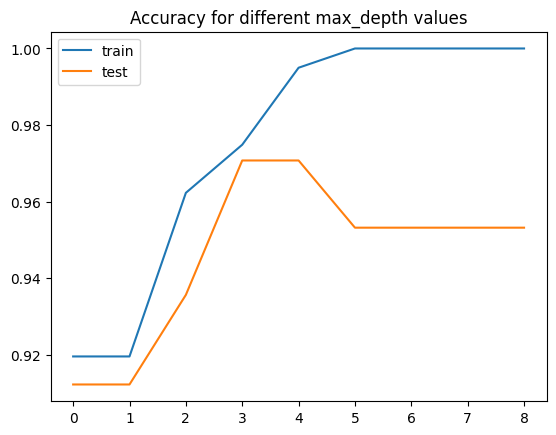

In [2]:
#| output-location: slide
from sklearn.metrics import accuracy_score

losses = []

for depth in range(1, 10):
  model = DecisionTreeClassifier(max_depth=depth, criterion="entropy", random_state=34)
  model.fit(X_train, y_train)
  losses.append([
    accuracy_score(y_train, model.predict(X_train)),
    accuracy_score(y_test, model.predict(X_test))
  ])

pd.DataFrame(losses, columns=['train', 'test']).plot(title='Accuracy for different max_depth values')

## Random Forest

Different model types have different techniques for dealing with overfitting.

One general idea is that instead of training one big model we train a bunch of small models and combine their results somehow.

## Random Forest

The simplest idea along these lines is called **bagging** (bootstrap aggregating). We will use decision trees to illustrate but this works for any model architecture.

The idea of bagging is that you train $n$ small decision trees on random subsets of the training data.
To generate the final output you then poll the trained decision trees.
In case of classification you do a majority vote and in case of regression you take the average.

## Random Forest

Bagging works because of the law of large numbers.

For example, suppose you are in a market and you would like to know the weight of a cow but you do not have scales.
What you could do is ask a bunch of random people what they think the cow weights and average the result.
You will usually get an answer that is very close to the truth.

## Random Forest

For law of large numbers to work you need the predictions of your trained decision trees to be uncorrelated.
This will not always be the case, because you are training on the same features.

To make the predictions less correlated you can also train the decision trees on a random subset of features and not just on a random subset of the training data.
This modelling technique is called **Random Forest**.

## Random Forest

There is also one more general idea called **boosting**.

The idea of boosting is that you train a sequence of small models, where when you train the $n$-th model you focus on the mistakes of the previous model.

## Random Forest

To illustrate, we will describe a boosting algorithm called AdaBoost (Adaptive Boosting) in the case of binary classification (for simplicity).

Suppose the vectors $(y_i, x_i),$ $i=1, \dots, m$ represent our training data, where $x_i = (x_{i1}, \dots, x_{in})$ is a vector.
And instead of $y_i$ being either 0 or 1 it is either -1 or 1.
If our models predict a positive number we will assign class 1 and otherwise we will assign class -1.

## Random Forest

We will be assigning weights to training samples in each training round of our algorithm.
So let $w_i^j$ denote the weight assigned to the $i$-th sample on the $j$-th round.
We will always have $\sum_j w_i^j = 1.$
On the first round we assign equal weights $1/m$.

Also let $T^j$ denote the tree trained during the $j$-th round.

After training compute the weighted classification error:
$$
e^j = \sum_i w_i^j \mathbb{1}_{y_i \ne T^j(x_i)}.
$$

## Random Forest

Now adjust the weights
$$
    w^{j+1}_i =  \begin{cases}
       w^{j}_i e^{- \alpha^j }/Z^j, \text{ if } T^j(x_i) = y_i, \\
       w^{j}_i e^{\alpha^j } / Z^j, \text{ if } T^j(x_i) \ne y_i.
    \end{cases},
$$
where
$$
    \alpha^j = \frac{1}{2} \ln \frac{1-e^j}{e^j}
$$
and $Z^j$ is a number that makes the new weights sum to 1.

## Random Forest

So the weight of a sample increases if the model misclassified it and decreases if the model guessed correctly.

The final model is then given by
$$
    T = \sum_j \alpha^j T^j.
$$

In practice boosting usually results in a more accurate model, but random forrest is faster to train since you can parallelize the training of trees.

## Random Forest

Let's train a Random Forest Regression model on California housing dataset that ships with sklearn. 

In [3]:
#| output-location: slide
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data["data"], columns=data["feature_names"])
X_train, X_test, y_train, y_test = train_test_split(df, data["target"], test_size=0.2, random_state=34)
X_train.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7067,4.4318,36.0,5.721014,1.050725,816.0,2.956522,33.95,-118.01
18972,5.2636,1.0,7.694030,1.279851,872.0,3.253731,38.23,-122.00
10877,3.9844,38.0,5.403042,1.140684,1236.0,4.699620,33.72,-117.88
20440,6.4963,6.0,7.799038,1.110096,6700.0,3.221154,34.24,-118.77
15424,4.3542,34.0,5.578313,0.969880,978.0,2.945783,33.20,-117.27
20222,3.5294,33.0,4.310962,1.098434,1835.0,2.052573,34.29,-119.29
16512,2.6368,34.0,5.769022,1.051630,1310.0,3.559783,37.72,-121.22
2622,1.8993,17.0,4.699367,1.091772,823.0,2.604430,40.95,-124.10
6033,3.8438,28.0,5.422432,1.120545,3502.0,3.670860,34.08,-117.73
3421,2.8000,34.0,4.553531,0.972665,2391.0,5.446469,34.28,-118.42


## Random Forest

We are given some information on a district and our goal is to predict the median house value in that district. The target variable is expressed in $100k.

Normally, we would first do data exploration and cleaning, but since we talked about this in the last chapter, let's jump straight into model code.

## Random Forest

In [4]:
#| output-location: slide
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def make_pipeline():
  model = RandomForestRegressor(
    n_estimators=100,
    max_depth=3,
    max_features="sqrt"
  )

  pipeline = Pipeline(
    steps=[
      ("imputer", SimpleImputer(strategy="median")),
      ("scaler", StandardScaler()),
      ("model", model),
    ],
  )

  return pipeline

pipeline = make_pipeline()
pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=3, max_features='sqrt'))])

## Random Forest

We are going to use mean square error (MSE) to evaluate our model. It is computed as follows:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i^{\text{true}}-y_i^{\text{pred}})^2
$$

In [5]:
from sklearn.metrics import mean_squared_error

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")

MSE on test set: 0.7042428595732597


## Hyperparameters

As you might have noticed, in the `RandomForestRegressor` we specified some parameters:

- `n_estimators`: number of trees to fit;
- `max_depth`: maximum depth of a fitted tree.

There are more, you can see all of them in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

## Hyperparameters

These are called model **hyperparameters**. A hyperparameter is a model parameter that the model does not learn while training. These are left for the model user to specify.

So we have a classification:

1. Weights: parameters that the model learns while training.
2. Hyperparameters: parameters that the model does not learn while training.

## Hyperparameters

Question is, how do we pick optimal hyperparameters?

Usually, it is done through trial and error by trying different combinations of reasonable values and seeing which perform best on the test dataset. This is called **grid search**.

## Grid Search

To implement a grid search we first need to unhardcode the hyperparameters in our pipeline.

In [6]:
def make_pipeline(n_estimators=100, max_depth=3):
  model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    max_features="sqrt",
    n_jobs=-1 # Use max available processors for training and inference
  )

  pipeline = Pipeline(
    steps=[
      ("imputer", SimpleImputer(strategy="median")),
      ("scaler", StandardScaler()),
      ("model", model),
    ],
  )

  return pipeline

## Grid Search

Now implementing a grid search from scratch is not difficult.

In [7]:
best_n_estimators = -1
best_max_depth = -1
best_mse = 1000

for n_estimators in [50, 100, 200, 500]:
  for max_depth in [2, 3, 4, 5]:
    pipeline = make_pipeline(n_estimators=n_estimators, max_depth=max_depth)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
      best_mse = mse
      best_n_estimators = n_estimators
      best_max_depth = max_depth

print(f"Best combination n_estimators={best_n_estimators}, max_depth={best_max_depth} with MSE={best_mse}")

Best combination n_estimators=100, max_depth=5 with MSE=0.4985365734911642


## Validation

Now that we used our test set to optimize hyperparameters we cannot use it to judge model performance, because we might have "overfit" the hyperparameters.

This is why usually you should split your data into three parts: train, validation and test:

- train: the set that you use to train the model;
- validation: the set that you use to tune the model, for example by doing grid search as we did;
- test: the set that you use only once at the end of the modelling process to evaluate the model.

## Validation

Note that its not set in stone which of the datasets are called validation and test. That is some people might switch the definitions around.

## Cross-validation

If you do not have a second data split for testing you can try to replace it using **cross-validation**.

There are several techniques for doing cross-validation. We will describe $K$-fold cross-validation.

In $K$-fold cross-validation you split your training data into $k$ parts. Now, in sequence, you take one of the parts to be the validation set and you train the model on the rest of the data. You then compute validation metrics on the validation part and then average these once you are done training $k$ times.

Typical values for $k$ are 5 or 10.

## Cross-validation

Here is how to perform cross validation in sklearn.

In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np

pipeline = make_pipeline(n_estimators=50, max_depth=5)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

print(f"Cross validation result MSE={np.mean(-1*scores)}")

Cross validation result MSE=0.5037206177056912


## Cross-validation

If your model takes hours to train then cross-validation is not viable. So in practice it is usually best to split you dataset into 3 parts.

## Practice problem

For practice, try creating a classification model for the [Forest cover types dataset](https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset). It ships with sklearn.

If you want to use Random Forest, you will need to use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) class from sklearn.

Here is how to load the data:

In [9]:
from sklearn.datasets import fetch_covtype

data = fetch_covtype()
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["target"] = data["target"]
df.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
